In [71]:
import numpy as np
import matplotlib.pyplot as plt
import odl
import torch
import torch.nn as nn

<Figure size 640x480 with 0 Axes>

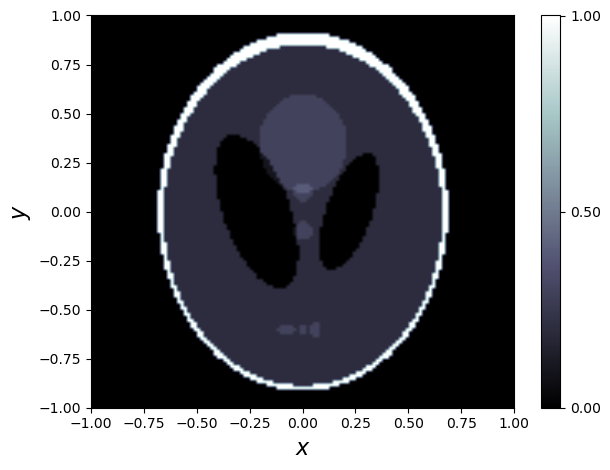

<Figure size 640x480 with 0 Axes>

In [72]:
# C1
space = odl.uniform_discr(min_pt=[-1,-1], max_pt=[1,1], shape=[128,128])

phantom = odl.phantom.transmission.shepp_logan(space, modified=True, min_pt=None, max_pt=None)

plt.figure()
phantom.show()
plt.show()

<Figure size 640x480 with 0 Axes>

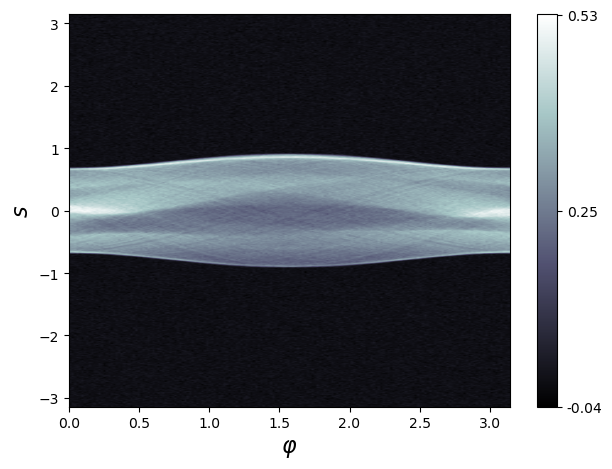

<Figure size 640x480 with 0 Axes>

In [73]:
### Radius from the source to object.
source_radius = 2

### Radius from the object to detector.
detector_radius = 1

angle_amount = 180
line_amount = 500

angles = odl.uniform_partition(0, np.pi, angle_amount)
lines = odl.uniform_partition(-np.pi, np.pi, int(line_amount))
geometry = odl.tomo.Parallel2dGeometry(angles, lines)

### Imagine a box in 2D-plane with this parameter being the most southwest point of the box.
min_domain_corner = [-1,-1]

### Imagine a box in 2D-plane with this parameter being the most northeast point of the box.
max_domain_corner = [1,1]

### Number of samples per axis.
shape = [128,128]

### Data type 
dtype = 'float'

domain = odl.uniform_discr(min_domain_corner, max_domain_corner, shape=shape, dtype=dtype)

### The ray transform is defined here

device = 'astra_cpu'

ray_transform = odl.tomo.RayTransform(domain, geometry, impl=device)

meas = ray_transform(phantom)
mean = 0
noise_percentage = 0.02
noise = np.random.normal(mean, np.asarray(meas).max(), meas.shape) * noise_percentage
meas = meas + noise

plt.figure()
meas.show()
plt.show()

<Figure size 640x480 with 0 Axes>

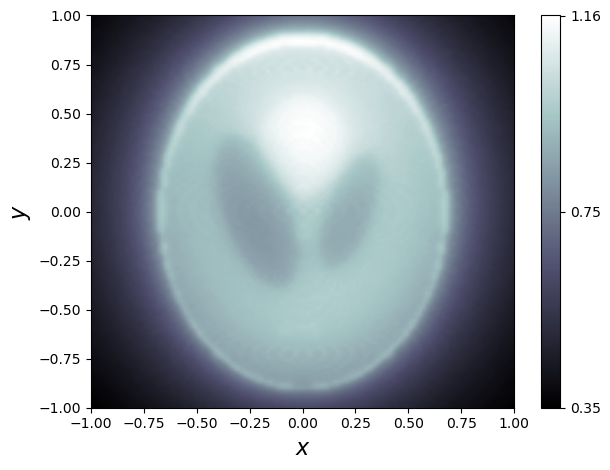

<Figure size 640x480 with 0 Axes>

In [74]:
unfiltered_op = ray_transform.adjoint

unfilt_eval = unfiltered_op(meas)

plt.figure()
unfilt_eval.show()
plt.show()

<Figure size 640x480 with 0 Axes>

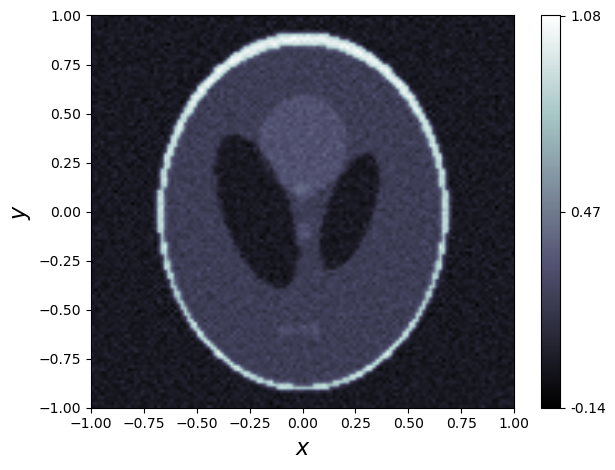

<Figure size 640x480 with 0 Axes>

In [75]:
filtered_op = odl.tomo.analytic.filtered_back_projection.fbp_op(ray_trafo=ray_transform, padding=1)

filtered_eval = filtered_op(meas)

plt.figure()
filtered_eval.show()
plt.show()

In [76]:
loss_test = nn.MSELoss()

# Defining PSNR function
def psnr(loss):
    
    psnr = 10 * np.log10(1.0 / (loss+1e-10))
    
    return psnr

reco_loss = loss_test(torch.as_tensor(phantom), torch.as_tensor(filtered_eval))
print(f'Reconstruction error with {noise_percentage*100}% noise is {psnr(reco_loss):.2f} dB.')

Reconstruction error with 2.0% noise is 24.92 dB.


In [77]:
# C2

A = np.zeros([angle_amount*line_amount, phantom.shape[1]*phantom.shape[0]])

for k in range(A.shape[1]):
    

IndentationError: expected an indented block (289439904.py, line 6)